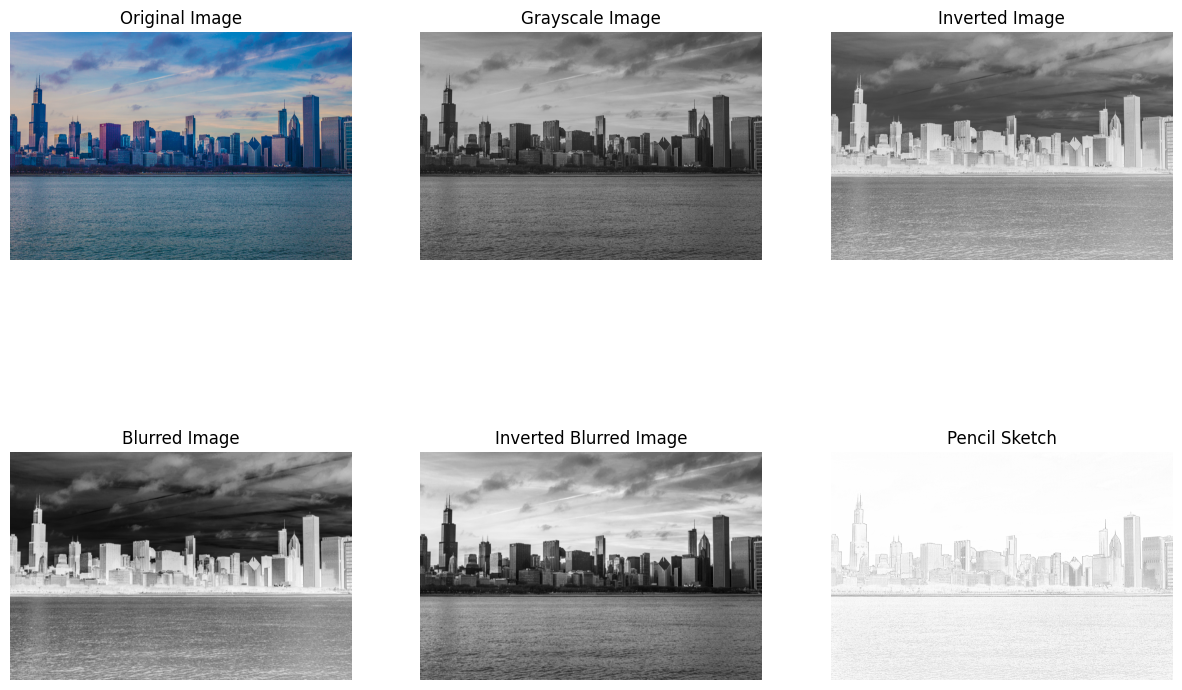

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = r"d:\photo\jeff-brown-xOj6_Ha1_R8-unsplash.jpg"
imagal = cv2.imread(image_path)

if imagal is None:
    print("❌error")
else:
    
    imagal_rgb = cv2.cvtColor(imagal, cv2.COLOR_BGR2RGB)

    grey_img = cv2.cvtColor(imagal, cv2.COLOR_BGR2GRAY)

    invert = cv2.bitwise_not(grey_img)


    blur = cv2.GaussianBlur(invert, (21, 21), 0)

    
    invertedblur = cv2.bitwise_not(blur)

    
    sketch = cv2.divide(grey_img, invertedblur, scale=256.0)

    sketch_path = r"d:\sketch.jpg"
    cv2.imwrite(sketch_path, sketch)


    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes[0, 0].imshow(imagal_rgb)
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(grey_img, cmap="gray")
    axes[0, 1].set_title("Grayscale Image")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(invert, cmap="gray")
    axes[0, 2].set_title("Inverted Image")
    axes[0, 2].axis("off")

    axes[1, 0].imshow(blur, cmap="gray")
    axes[1, 0].set_title("Blurred Image")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(invertedblur, cmap="gray")
    axes[1, 1].set_title("Inverted Blurred Image")
    axes[1, 1].axis("off")

    axes[1, 2].imshow(sketch, cmap="gray")
    axes[1, 2].set_title("Pencil Sketch")
    axes[1, 2].axis("off")

    plt.show()


# Image processing

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import base64
import cv2
import numpy as np
import io
from PIL import Image
import flask
from PIL import Image, ImageOps
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
    
FILTERS = {
    # تحسين وتعديل الصورة الأساسية : A مجموعة 
    "grayscale": "تحويل إلى الأبيض والأسود",
    "brightness": "زيادة السطوع",
    "contrast": "زيادة التباين",
    "histogram_equalization": "تصحيح الألوان",
    "invert": "عكس الألوان",
    "super_resolution": "تحسين جودة الصورة",
    "sharpen": "تحسين التفاصيل",
    "saturation_boost": "زيادة تشبع الألوان",
    # تأثيرات الرسم والفنون : B مجموعة 
    "pencil_sketch": "رسم بالقلم الرصاص",
    "cartoon": "تحويل إلى كرتون",
    "cartoon_v2": "V2 تحويل إلى كرتون ",
    "oil_paint": "تأثير الرسم الزيتي",
    "pixel_art": "تأثير البيكسل آرت",
    "pop_art": "Pop Art تأثير",
    "halftone": "Halftone نمط",
    "van_gogh": "لوحة بأسلوب فان جوخ",
    "charcoal_drawing": "رسم بالفحم",
    "ink_drawing": "تأثير الرسم بالحبر",
    "sketch_effect": "رسم تخطيطي ",
    "stencil": "(Stencil) تأثير قالب",
    "polaroid": "تأثير بولارويد",
    "sketch_color": "رسم تخطيطي ملون",
    "sketch_color2": "رسم تخطيطي ملون بديل",
    "watercolor": "تأثير الألوان المائية",
    "comic_book": "تأثير الكتاب الهزلي",
    "watercolor_blend": "دمج تأثير الألوان المائية مع الصورة الأصلية",
    "watercolor_wash": "تأثير غسيل ألوان مائية",
    "oil_sketch": "تأثير رسم زيتي مع لمسة تخطيطية",
    "stained_glass": "تأثير الزجاج الملون",
    "line_art": "تأثير خطوط فنية",
    "sketch_drawing": "رسم تخطيطي يدوي",
    "cartoon_edge": "تحويل إلى كرتون بحواف واضحة",
    "soft_pastel": "تأثير الباستيل الناعم",
    "emboss": "نقش بارز",
    # تأثيرات الرؤية الخاصة : C مجموعة 
    "night_vision": "الرؤية الليلية",
    "infrared_effect": "تأثير الأشعة تحت الحمراء",
    "thermal_vision": "الرؤية الحرارية",
    "ultraviolet_effect": "تأثير الأشعة فوق البنفسجية",
    "fog_effect": "تأثير الضباب",
    #  إزالة الخلفية : D مجموعة 
    "remove_background": "إزالة الخلفية",
    # تأثيرات التشويه والتجريد والخلل : E مجموعة 
    "swirl_effect": "تأثير الدوامة",
    "glitch": "Glitch تأثير",
    "displacement_map": "تأثير التشويه",
    "embossed_lines": "خطوط منقوشة",
    "glitch_art_v2": "Glitch Art v2 تأثير",
    "cartoonify": "تحويل إلى كرتون محسّن",
    "hdr_enhance": "HDR تحسين",
    "pixel_glitch": "تأثير خلل بكسلي",
    "pixel_sort": "تأثير فرز البكسل",
    "ripple": "تأثير تموج",
    "swirl_vortex": "تأثير دوامة مع تشويه أكبر",
    "vortex": "تأثير الدوامة العميقة",
    "vortex_swirl": "(Vortex Swirl) تأثير دوامة",
    "fractal": "تأثير فراكتال",
    "sci_fi": "تأثير خيال علمي",
    "solarize": "تأثير سولاريز",
    "poster_blend": "مع الصورة Posterize دمج تأثير ",
    # التأثيرات الكلاسيكية والقديمة : F مجموعة  
    "vintage": "تأثير قديم ",
    "inverted_contrast": "عكس التباين",
    "old_film": "تأثير فيلم قديم",
    "retro": "تأثير ريترو",
    "lomo": "تأثير لو-مو",
    "vintage_fade": "تأثير قديم مع تلاشي الألوان",
    "vintage_crush": "تأثير تقليل عمق الألوان القديم",
    # تأثيرات الألوان والتدرج : G مجموعة 
    "sepia": "Sepia تأثير",
    "posterize": "تقليل عدد الألوان ",
    "gradient_map": "خريطة التدرج اللوني",
    "gradient_overlay": "تأثير تدرج لوني",
    "chromatic_aberration": "تأثير انحراف لوني",
    "pop_color": "تأثير ألوان بوب",
    "dual_tone": "تأثير ثنائي اللون",
    # تأثيرات الحركة والتحويلات الهندسية : H مجموعة 
    "mirror": "انعكاس الصورة",
    "motion_blur": "تأثير تشويش الحركة",
    "rgb_split": "تأثير فصل قنوات الألوان",
    "kaleidoscope": "تأثير الكاليدوسكوب",
    "water_drop": "تأثير قطرة ماء",
    "fisheye": "تأثير عين السمكة",
    "fisheye_zoom": "تأثير تكبير عين السمكة",
    "mirror_vertical": "انعكاس عمودي للصورة",
    "mirror_diagonal": "انعكاس قطري",
    "mosaic": "تأثير الفسيفساء",
    # تأثيرات الإضاءة والظل : I مجموعة 
    "glow": "تأثير التألق",
    "vignette": "تأثير الظلال",
    "tilt_shift": "تأثير ميل الصورة",
    "hdr": "HDR تأثير",
    "film_grain": "تأثير حبوب الفيلم",
    "double_exposure": "تأثير التعرض المزدوج",
    "light_leak": "تأثير تسرب الضوء",
    "soft_glow": "تأثير توهج ناعم",
    "light_reflection": "تأثير انعكاس الضوء",
    "glowing_edges": "تأثير حواف متوهجة",
    "spotlight": "(Spotlight) تأثير ضوء مركزي",
    "light_streaks": "تأثير خيوط ضوئية",
    "shadow_cast": "تأثير ظل",
    # تأثيرات الحواف : J مجموعة 
    "canny_edge": "اكتشاف الحواف",
    "edge_detect": "اكتشاف الحواف المتقدم",
    #تأثيرات البكسلة والتحويلات : K مجموعة 
    "pixelate": "تأثير بكسلة",
    "crystallize": "(Crystallize) تأثير البلورات",
    "crystal_effect": "تأثير بلوري",
    "vintage_noise": "تأثير ضوضاء قديمة",
    # تأثيرات إضافية متنوعة : L مجموعة 
    "color_splash": "تأثير إبراز لون",
    "color_inversion": "عكس الألوان المتقدم",
    "rainbow": "تأثير قوس قزح",
    "neon": "تأثير النيون",
    "neon_glow": "تأثير توهج النيون",
    "neon_lines": "تأثير خطوط نيون",
    "contrast_boost": "تعزيز التباين",
    "drift": "تأثير انزياح عشوائي",
    "smudge": "تأثير تمويه",
    "infrared_blend": "دمج تأثير الأشعة تحت الحمراء",
    "dreamy": "تأثير حالمة",
    "flash": "تأثير فلاش",
    "thermal_heatmap": "تأثير خريطة حرارية",
    "poster_edge": "تأثير حواف بوستر",
    "drama": "تأثير درامي",
    "smoke": "تأثير دخان",
    "splash": "تأثير رذاذ",
    "oil_reflection": "تأثير انعكاس الرسم الزيتي",
    "dehaze": "إزالة الضباب",
    "sharp_edges": "تأثير حواف حادة",
    "color_wave": "تأثير موجة لونية",
    # تأثيرات التصفية والتنعيم : M مجموعة 
    "gaussian_blur": "تنعيم الصورة",
    "soft_focus": "تركيز ناعم",
    "vivid_colors": "ألوان زاهية",
    # تأثيرات الطقس والعناصر الطبيعية : N مجموعة
    "rain_effect": "تأثير المطر",
    "snow_effect": "تأثير الثلج",
    # التأثيرات الرقمية والخيالية : o مجموعة 
    "hologram" : "تأثير الهولوجرام",
    "surreal": "تأثير سريالي",
    "glitter": "تأثير البريق واللمعان"
}
def apply_filter(image, filter_type):
    """تطبيق التأثيرات المختلفة على الصورة"""
    if filter_type == "grayscale":
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    elif filter_type == "brightness":
        
        return cv2.convertScaleAbs(image, alpha=1.5, beta=50)

    elif filter_type == "contrast":
        
        return cv2.convertScaleAbs(image, alpha=2.0, beta=0)
    
    elif filter_type == "histogram_equalization":
        img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    
    elif filter_type == "invert":
        
        return cv2.bitwise_not(image)
    elif filter_type == "super_resolution":
       upscaled = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
       return cv2.resize(upscaled, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_AREA)
    
    elif filter_type == "sharpen":
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
        
        return cv2.filter2D(image, -1, kernel)

    elif filter_type == "saturation_boost":
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 2, 0, 255)
        
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#----------                    
    
    elif filter_type == "pencil_sketch":
        gray, sketch = cv2.pencilSketch(image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
        
        return sketch
    
    elif filter_type == "cartoon":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 9, 9)
        color = cv2.bilateralFilter(image, 9, 300, 300)
        
        return cv2.bitwise_and(color, color, mask=edges)

    elif filter_type == "cartoon_v2":
       gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       gray = cv2.medianBlur(gray, 5)
       edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)
       color = cv2.bilateralFilter(image, 9, 250, 250)
       return cv2.bitwise_and(color, color, mask=edges)
    
    elif filter_type == "oil_paint":
        try:
            
            return cv2.stylization(image, sigma_s=150, sigma_r=0.25)
        
        except AttributeError:
            
            return cv2.bilateralFilter(image, 9, 75, 75)
    
    elif filter_type == "pixel_art":
            small = cv2.resize(image, (50, 50), interpolation=cv2.INTER_NEAREST)
        
            return cv2.resize(small, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    elif filter_type == "pop_art":
        
        return cv2.stylization(image, sigma_s=60, sigma_r=0.45)
    elif filter_type == "halftone":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        dithered = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)
        
        return cv2.cvtColor(dithered, cv2.COLOR_GRAY2BGR)
    
    elif filter_type == "van_gogh":
        
        return cv2.stylization(image, sigma_s=200, sigma_r=0.3)
    elif filter_type == "charcoal_drawing":
       gray, sketch = cv2.pencilSketch(image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
       return sketch

    elif filter_type == "ink_drawing":
       gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       inverted = cv2.bitwise_not(gray)
       blurred = cv2.GaussianBlur(inverted, (21, 21), 0)
       sketch = cv2.divide(gray, 255 - blurred, scale=256).astype(np.uint8)
       detail = cv2.GaussianBlur(sketch, (0, 0), 3)
       sharpened = cv2.addWeighted(sketch, 1.5, detail, -0.5, 0)
       sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
       lut = np.zeros((256, 1, 3), dtype=np.uint8)
       for i in range(256):
           lut[i, 0] = [255, i, i]
       three_channel = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2BGR)
       blue_toned = cv2.LUT(three_channel, lut)
       return blue_toned




    elif filter_type == "sketch_effect":
       gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       inv = cv2.bitwise_not(gray)
       blur = cv2.GaussianBlur(inv, (21, 21), 0)
       return cv2.divide(gray, 255 - blur, scale=256)
    elif filter_type == "polaroid":
        border = cv2.copyMakeBorder(image, 50, 150, 50, 50, cv2.BORDER_CONSTANT, value=[255, 255, 255])
        return border

    elif filter_type == "sketch_color":
       gray_sketch, color_sketch = cv2.pencilSketch(image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
       result = cv2.addWeighted(image, 0.5, color_sketch, 0.5, 0)
       return result


    elif filter_type == "sketch_color2":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        inv = cv2.bitwise_not(gray)
        blur = cv2.GaussianBlur(inv, (9, 9), 0)
        sketch = cv2.divide(gray, 255 - blur, scale=256)
        
        return cv2.addWeighted(image, 0.4, cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR), 0.6, 0)

    elif filter_type == "watercolor":
     
        return cv2.stylization(image, sigma_s=60, sigma_r=0.6)
    elif filter_type == "watercolor_blend":
        stylized = cv2.stylization(image, sigma_s=60, sigma_r=0.6)
        return cv2.addWeighted(image, 0.5, stylized, 0.5, 0)

    elif filter_type == "watercolor_wash":
        stylized = cv2.stylization(image, sigma_s=80, sigma_r=0.7)
        
        return cv2.addWeighted(image, 0.4, stylized, 0.6, 0)

    elif filter_type == "oil_sketch":
        try:
            return cv2.xphoto.oilPainting(image, 7, 1)
        except AttributeError:
            return cv2.bilateralFilter(image, 9, 75, 75)

    elif filter_type == "comic_book":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
        cartoon = cv2.bitwise_and(image, image, mask=thresh)
        cartoon = cv2.addWeighted(cartoon, 0.8, cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR), 0.2, 0)
        return cartoon

    elif filter_type == "stained_glass":
        Z = image.reshape((-1, 3))
        Z = np.float32(Z)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 8
        _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        return res.reshape(image.shape)

    elif filter_type == "line_art":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        
        return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    elif filter_type == "sketch_drawing":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        inv = cv2.bitwise_not(gray)
        blur = cv2.GaussianBlur(inv, (7, 7), 0)
        sketch = cv2.divide(gray, 255 - blur, scale=256)
        return sketch
    
    elif filter_type == "cartoon_edge":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 9, 2)
        color = cv2.bilateralFilter(image, 9, 250, 250)
        return cv2.bitwise_and(color, color, mask=edges)

    elif filter_type == "soft_pastel":
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
      hsv[:, :, 1] = hsv[:, :, 1] * 0.3
      hsv[:, :, 2] = cv2.add(hsv[:, :, 2], 30)
      return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    elif filter_type == "emboss":
        kernel = np.array([[-2, -1, 0],
                       [-1,  1, 1],
                       [ 0,  1, 2]])
        return cv2.filter2D(image, -1, kernel)
    
    
#----------------
   
    elif filter_type == "night_vision":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        return cv2.applyColorMap(gray, cv2.COLORMAP_OCEAN)

    elif filter_type == "infrared_effect":
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 0] = 0
        hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 2, 0, 255)
        hsv[:, :, 2] = np.clip(hsv[:, :, 2] * 1.5, 0, 255)
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    elif filter_type == "thermal_vision":
       return cv2.applyColorMap(image, cv2.COLORMAP_JET)

    elif filter_type == "ultraviolet_effect":
       B, G, R = cv2.split(image)
       B = cv2.add(B, 50)
       R = cv2.add(R, 30)
       return cv2.merge([B, G, R])

    elif filter_type == "fog_effect":
       overlay = np.full(image.shape, (150, 150, 150), dtype=np.uint8)
       return cv2.addWeighted(image, 0.6, overlay, 0.4, 0)
#-----------    
    elif filter_type == "remove_background":
       mask = np.zeros(image.shape[:2], np.uint8)
       bgdModel = np.zeros((1, 65), np.float64)
       fgdModel = np.zeros((1, 65), np.float64)
       rect = (10, 10, image.shape[1] - 20, image.shape[0] - 20)
       cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
       mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
       return image * mask2[:, :, np.newaxis] if len(image.shape) == 3 else image * mask2

#--------------
    elif filter_type == "swirl_effect":
       h, w = image.shape[:2]
       center_x, center_y = w // 2, h // 2
       radius = min(center_x, center_y)
       swirl = np.zeros_like(image)
       for y in range(h):
           for x in range(w):
               dx = x - center_x
               dy = y - center_y
               distance = np.sqrt(dx**2 + dy**2)
               if distance < radius:
                   angle = np.pi * (radius - distance) / radius
                   new_x = int(center_x + dx * np.cos(angle) - dy * np.sin(angle))
                   new_y = int(center_y + dx * np.sin(angle) + dy * np.cos(angle))
                   if 0 <= new_x < w and 0 <= new_y < h:
                       swirl[y, x] = image[new_y, new_x]
                   else:
                       swirl[y, x] = image[y, x]
               else:
                   swirl[y, x] = image[y, x]
       return swirl


    elif filter_type == "glitch":
       rows, cols, _ = image.shape
       shift = cols // 10
       glitched = np.zeros_like(image)
       glitched[:, :cols - shift] = image[:, shift:]
       glitched[:, cols - shift:] = image[:, :shift]
       return glitched

    elif filter_type == "glitch_art_v2":
        output = image.copy()
        rows, cols = image.shape[:2]
        for i in range(0, rows, 20):
            shift = np.random.randint(-10, 10)
            output[i:i+10] = np.roll(output[i:i+10], shift, axis=1)
        return output

    elif filter_type == "displacement_map":
        rows, cols = image.shape[:2]
        X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
        displacement = 10 * np.sin(2 * np.pi * Y / 30)
        map_x = (X + displacement).astype(np.float32)
        map_y = Y.astype(np.float32)
        return cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)

    elif filter_type == "embossed_lines":
        kernel = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
        return cv2.filter2D(image, -1, kernel)
    
    elif filter_type == "cartoonify":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 5)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 9, 9)
        color = cv2.bilateralFilter(image, 9, 250, 250)
        return cv2.bitwise_and(color, color, mask=edges)


    elif filter_type == "hdr_enhance":
        return cv2.detailEnhance(image, sigma_s=12, sigma_r=0.15)
    

    elif filter_type == "pixel_sort":
        output = image.copy()
        for i in range(image.shape[0]):
          row = output[i]
        sorted_row = row[np.argsort(row[:, 0])]
        output[i] = sorted_row
        return output

    elif filter_type == "ripple":
        rows, cols = image.shape[:2]
        X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
        shift = 5 * np.sin(2 * np.pi * Y / 30)
        map_x = (X + shift).astype(np.float32)
        map_y = Y.astype(np.float32)
        return cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)

    elif filter_type == "swirl_vortex":
        h, w = image.shape[:2]
        center_x, center_y = w // 2, h // 2
        swirl = np.zeros_like(image)
        for y in range(h):
         for x in range(w):
            dx = x - center_x
            dy = y - center_y
            r = np.sqrt(dx**2 + dy**2)
            angle = np.arctan2(dy, dx) + 0.001 * r * 10
            new_x = int(center_x + r * np.cos(angle))
            new_y = int(center_y + r * np.sin(angle))
            if 0 <= new_x < w and 0 <= new_y < h:
                swirl[y, x] = image[new_y, new_x]
            else:
                swirl[y, x] = image[y, x]
        return swirl
    elif filter_type == "vortex":
        h, w = image.shape[:2]
        center_x, center_y = w // 2, h // 2
        vortex = np.zeros_like(image)
        for y in range(h):
            for x in range(w):
                dx = x - center_x
                dy = y - center_y
                r = np.sqrt(dx * dx + dy * dy)
                theta = np.arctan2(dy, dx) + (r / max(center_x, center_y)) * np.pi / 2
                new_x = int(center_x + r * np.cos(theta))
                new_y = int(center_y + r * np.sin(theta))
                if 0 <= new_x < w and 0 <= new_y < h:
                    vortex[y, x] = image[new_y, new_x]
                else:
                    vortex[y, x] = image[y, x]
        return vortex

    elif filter_type == "vortex_swirl":
        h, w = image.shape[:2]
        center_x, center_y = w // 2, h // 2
        vortex = np.zeros_like(image)
        for y in range(h):
            for x in range(w):
                dx = x - center_x
                dy = y - center_y
                r = np.sqrt(dx**2 + dy**2)
                theta = np.arctan2(dy, dx) + 0.005 * r
                new_x = int(center_x + r * np.cos(theta))
                new_y = int(center_y + r * np.sin(theta))
                if 0 <= new_x < w and 0 <= new_y < h:
                    vortex[y, x] = image[new_y, new_x]
                else:
                    vortex[y, x] = image[y, x]
        
        return vortex

    elif filter_type == "fractal":
        temp = image.copy()
        for _ in range(3):
            blurred = cv2.GaussianBlur(temp, (7, 7), 0)
            temp = cv2.subtract(temp, blurred)
        
        return cv2.addWeighted(image, 0.7, temp, 0.3, 0)

    elif filter_type == "sci_fi":
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = cv2.multiply(hsv[:, :, 1], 1.5)
        hsv[:, :, 0] = (hsv[:, :, 0] + 20) % 180
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    elif filter_type == "solarize":
        threshold = 128
        inverted = cv2.bitwise_not(image)
        solarized = np.where(image < threshold, image, inverted)
        return solarized.astype(np.uint8)

    elif filter_type == "poster_blend":
        im_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        poster = ImageOps.posterize(im_pil, bits=4)
        poster_np = np.array(poster)
        poster_bgr = cv2.cvtColor(poster_np, cv2.COLOR_RGB2BGR)
        return cv2.addWeighted(image, 0.5, poster_bgr, 0.5, 0)
#---------------------------
    elif filter_type == "vintage":
      sepia = apply_filter(image, "sepia")
      overlay = np.full(image.shape, (20, 66, 112), dtype=np.uint8)
      return cv2.addWeighted(sepia, 0.7, overlay, 0.3, 0)

    elif filter_type == "inverted_contrast":
       inverted = cv2.bitwise_not(image)
       return cv2.convertScaleAbs(inverted, alpha=2.0, beta=0)

    elif filter_type == "old_film":
        sepia = cv2.transform(image, np.array([[0.272, 0.534, 0.131],
                                           [0.349, 0.686, 0.168],
                                           [0.393, 0.769, 0.189]]))
        noise = np.random.normal(0, 15, image.shape).astype(np.uint8)
        return cv2.addWeighted(sepia.astype(np.uint8), 0.8, noise, 0.2, 0)

    elif filter_type == "retro":
        sepia = np.array([[0.272, 0.534, 0.131],
                          [0.349, 0.686, 0.168],
                          [0.393, 0.769, 0.189]])
        retro = cv2.transform(image, sepia)
        return np.clip(retro, 0, 255).astype(np.uint8)

    elif filter_type == "lomo":
        rows, cols = image.shape[:2]
        center_x, center_y = cols // 2, rows // 2
        mask = np.zeros((rows, cols), dtype=np.uint8)
        cv2.circle(mask, (center_x, center_y), min(rows, cols) // 2, 255, -1)
        blur = cv2.GaussianBlur(image, (21, 21), 0)
        return cv2.addWeighted(image, 0.7, blur, 0.3, 0)

    elif filter_type == "vintage_fade":
        sepia = np.array([[0.272, 0.534, 0.131],
                          [0.349, 0.686, 0.168],
                          [0.393, 0.769, 0.189]])
        sepia_img = cv2.transform(image, sepia)
        return cv2.convertScaleAbs(sepia_img, alpha=0.7, beta=30)

    elif filter_type == "vintage_crush":
        crushed = (image // 32) * 32
        return crushed.astype(np.uint8)
#-----------------------    
    elif filter_type == "sepia":
        kernel = np.array([[0.272, 0.534, 0.131],
                           [0.349, 0.686, 0.168],
                           [0.393, 0.769, 0.189]])
        
        return cv2.transform(image, kernel).clip(0, 255).astype(np.uint8)

    elif filter_type == "posterize":
       im_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
       im_poster = ImageOps.posterize(im_pil, bits=3)
       im_np = np.array(im_poster)
       return cv2.cvtColor(im_np, cv2.COLOR_RGB2BGR)

    elif filter_type == "gradient_map":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gradient = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
        return gradient

    elif filter_type == "gradient_overlay":
        rows, cols = image.shape[:2]
        gradient = np.linspace(0, 1, rows, dtype=np.float32).reshape(rows, 1)
        gradient = np.repeat(gradient, cols, axis=1)
        gradient = cv2.merge([gradient, gradient, gradient])
        
        return cv2.addWeighted(image, 0.8, (gradient * 255).astype(np.uint8), 0.2, 0)

    elif filter_type == "chromatic_aberration":
        B, G, R = cv2.split(image)
        B = np.roll(B, 5, axis=1)
        R = np.roll(R, -5, axis=1)
        
        return cv2.merge([B, G, R])

    elif filter_type == "pop_color":
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.5, 0, 255)
        hsv[:, :, 2] = np.clip(hsv[:, :, 2] * 1.3, 0, 255)
        
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    elif filter_type == "dual_tone":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        binary_color = cv2.applyColorMap(binary, cv2.COLORMAP_BONE)
        return cv2.addWeighted(image, 0.5, binary_color, 0.5, 0)
 
    elif filter_type == "stencil":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
        
        return cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
#-------------------------------
    elif filter_type == "mirror":
       return cv2.flip(image, 1)

    elif filter_type == "motion_blur":
      size = 15
      kernel = np.zeros((size, size))
      kernel[int((size - 1) / 2), :] = np.ones(size)
      kernel = kernel / size
      return cv2.filter2D(image, -1, kernel)

    elif filter_type == "rgb_split":
        B, G, R = cv2.split(image)
        B = np.roll(B, 5, axis=1)
        G = np.roll(G, -5, axis=0)
        R = np.roll(R, 5, axis=0)
        return cv2.merge([B, G, R])

    elif filter_type == "kaleidoscope":
        h, w = image.shape[:2]
        center = (h // 2, w // 2)
        crop = image[0:center[0], 0:center[1]]
        mirror_h = cv2.flip(crop, 1)
        mirror_v = cv2.flip(crop, 0)
        mirror_hv = cv2.flip(crop, -1)
        top = np.concatenate((crop, mirror_h), axis=1)
        bottom = np.concatenate((mirror_v, mirror_hv), axis=1)
        return np.concatenate((top, bottom), axis=0)

    elif filter_type == "water_drop":
        h, w = image.shape[:2]
        center_x, center_y = w // 2, h // 2
        radius = min(center_x, center_y) // 4
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        mask = (X - center_x) ** 2 + (Y - center_y) ** 2 < radius ** 2
        displacement = 10
        map_x = X.astype(np.float32)
        map_y = Y.astype(np.float32)
        map_x[mask] += displacement * np.sin((X[mask] - center_x) / radius * np.pi)
        map_y[mask] += displacement * np.sin((Y[mask] - center_y) / radius * np.pi)
        return cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)

    elif filter_type == "fisheye":
        h, w = image.shape[:2]
        K = np.array([[w, 0, w / 2], [0, w, h / 2], [0, 0, 1]], dtype=np.float32)
        D = np.array([-0.3, 0.1, 0, 0], dtype=np.float32)
        map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, (w, h), cv2.CV_16SC2)
        return cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    elif filter_type == "fisheye_zoom":
       h, w = image.shape[:2]
       K = np.array([[w, 0, w/2],
                    [0, w, h/2],
                  [0, 0, 1]], dtype=np.float32)
       D = np.array([-0.5, 0.2, 0, 0], dtype=np.float32)
       map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, (w, h), cv2.CV_16SC2)
       return cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT) 

    elif filter_type == "mirror_vertical":
        return cv2.flip(image, 0)

    elif filter_type == "mirror_diagonal":
        
        return cv2.transpose(cv2.flip(image, 0))

    elif filter_type == "mosaic":
        scale = 0.1
        small = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        return cv2.resize(small, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
#--------------------------
    elif filter_type == "glow":
        blur = cv2.GaussianBlur(image, (15, 15), 0)
        return cv2.addWeighted(image, 0.7, blur, 0.3, 0)

    elif filter_type == "vignette":
        rows, cols = image.shape[:2]
        X, Y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
        mask = np.sqrt(X**2 + Y**2)
        mask = np.clip(mask, 0, 1)
        vignette = cv2.merge([mask, mask, mask])
        return cv2.addWeighted(image, 0.8, (vignette * 255).astype(np.uint8), 0.2, 0)

    elif filter_type == "tilt_shift":
        blur = cv2.GaussianBlur(image, (15, 15), 0)
        mask = np.zeros_like(image, dtype=np.uint8)
        mask[image.shape[0]//3:2*image.shape[0]//3, :] = 255
        return cv2.addWeighted(image, 0.7, blur, 0.3, 0, mask)

    elif filter_type == "hdr":
        hdr = cv2.detailEnhance(image, sigma_s=12, sigma_r=0.15)
        return hdr

    elif filter_type == "film_grain":
        noise = np.random.randint(0, 50, image.shape, dtype=np.uint8)
        return cv2.addWeighted(image, 0.8, noise, 0.2, 0)

    elif filter_type == "double_exposure":
        flipped = cv2.flip(image, 1)
        return cv2.addWeighted(image, 0.6, flipped, 0.4, 0)
    elif filter_type == "light_leak":
        overlay = np.zeros_like(image, dtype=np.uint8)
        rows, cols = image.shape[:2]
        for i in range(rows):
            alpha = i / rows
            color = (0, int(255 * alpha), int(255 * alpha))
            cv2.line(overlay, (0, i), (cols, i), color, 1)
        return cv2.addWeighted(image, 0.8, overlay, 0.2, 0)

    elif filter_type == "soft_glow":
        blurred = cv2.GaussianBlur(image, (25, 25), 0)
        return cv2.addWeighted(image, 0.6, blurred, 0.4, 0)
 
    elif filter_type == "light_reflection":
       rows, cols = image.shape[:2]
       gradient = np.zeros((rows, cols), dtype=np.float32)
       for i in range(rows):
           gradient[i, :] = np.linspace(0.5, 1.0, cols)
       gradient = cv2.merge([gradient, gradient, gradient])
       result = cv2.multiply(image.astype(np.float32) / 255, gradient)
       return np.clip(result * 255, 0, 255).astype(np.uint8)


    elif filter_type == "glowing_edges":
        edges = cv2.Canny(image, 50, 150)
        edges = cv2.GaussianBlur(edges, (5, 5), 0)
        edges_colored = cv2.applyColorMap(edges, cv2.COLORMAP_WINTER)
        return cv2.addWeighted(image, 0.8, edges_colored, 0.5, 0)

    elif filter_type == "spotlight":
        rows, cols = image.shape[:2]
        mask = np.zeros((rows, cols), dtype=np.float32)
        center_x, center_y = cols / 2, rows / 2
        max_distance = np.sqrt(center_x**2 + center_y**2)
        for y in range(rows):
            for x in range(cols):
                distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
                mask[y, x] = np.clip(1 - distance / max_distance, 0, 1)
        mask = cv2.merge([mask, mask, mask])
        result = cv2.multiply(image.astype(np.float32) / 255, mask) * 255
        return np.clip(result, 0, 255).astype(np.uint8)


    elif filter_type == "light_streaks":
        rows, cols = image.shape[:2]
        streaks = np.zeros_like(image, dtype=np.uint8)
        for i in range(5):
            x = np.random.randint(0, cols)
            cv2.line(streaks, (x, 0), (x, rows), (255, 255, 255), 2)
        
        return cv2.addWeighted(image, 0.9, streaks, 0.1, 0)

    elif filter_type == "shadow_cast":
        rows, cols = image.shape[:2]
        mask = np.zeros((rows, cols), dtype=np.uint8)
        cv2.rectangle(mask, (cols//4, rows//4), (3*cols//4, 3*rows//4), 255, -1)
        shadow = cv2.GaussianBlur(mask, (51, 51), 0)
        shadow = cv2.merge([shadow, shadow, shadow])
        
        return cv2.addWeighted(image, 0.8, shadow, 0.2, 0)
#------------------------------
    elif filter_type == "canny_edge":
        
        return cv2.Canny(image, 100, 200)
    elif filter_type == "edge_detect":
        grad_x = cv2.Sobel(image, cv2.CV_16S, 1, 0)
        grad_y = cv2.Sobel(image, cv2.CV_16S, 0, 1)
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        return cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#---------------------------------
    elif filter_type == "pixelate":
        block_size = 10
        (h, w) = image.shape[:2]
        temp = cv2.resize(image, (max(1, w // block_size), max(1, h // block_size)), interpolation=cv2.INTER_LINEAR)
        return cv2.resize(temp, (w, h), interpolation=cv2.INTER_NEAREST)
    elif filter_type == "crystallize":
        Z = image.reshape((-1, 3))
        Z = np.float32(Z)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 5  
        _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        return res.reshape((image.shape))

    elif filter_type == "crystal_effect":
        h, w = image.shape[:2]
        block_size = 20
        output = image.copy()
        for i in range(0, h, block_size):
          for j in range(0, w, block_size):
             block = image[i:i+block_size, j:j+block_size]
             color = block.mean(axis=(0,1), keepdims=True).astype(np.uint8)
             output[i:i+block_size, j:j+block_size] = color
        return output

    elif filter_type == "vintage_noise":
       
        noise = np.random.normal(0, 25, image.shape).astype(np.int16)
        noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        return cv2.addWeighted(image, 0.8, noisy_image, 0.2, 0)
#-------------------------------------------
    elif filter_type == "color_splash":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        mask = cv2.inRange(image, (0, 0, 100), (100, 100, 255))
        mask = cv2.GaussianBlur(mask, (7, 7), 0).astype(np.float32) / 255.0
        return (image * mask[:, :, None] + gray_bgr * (1 - mask[:, :, None])).astype(np.uint8)

    elif filter_type == "color_inversion":
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 0] = (hsv[:, :, 0] + 90) % 180
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    elif filter_type == "rainbow":
        rows, cols = image.shape[:2]
        rainbow = np.zeros((rows, cols, 3), dtype=np.uint8)
        for i in range(rows):
            color = cv2.applyColorMap(np.uint8(np.full((1, cols), i*255//rows)), cv2.COLORMAP_RAINBOW)
            rainbow[i] = color
        return cv2.addWeighted(image, 0.7, rainbow, 0.3, 0)

    elif filter_type == "neon":
        edges = cv2.Canny(image, 100, 200)
        kernel = np.ones((3, 3), np.uint8)
        edges = cv2.dilate(edges, kernel, iterations=1)
        neon = cv2.applyColorMap(edges, cv2.COLORMAP_HOT)
        return cv2.addWeighted(image, 0.7, neon, 0.3, 0)

    elif filter_type == "neon_glow":
        edges = cv2.Canny(image, 50, 150)
        edges = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
        neon = cv2.applyColorMap(edges, cv2.COLORMAP_SUMMER)
        return cv2.addWeighted(image, 0.8, neon, 0.4, 0)
 
    elif filter_type == "neon_lines":
        edges = cv2.Canny(image, 100, 200)
        edges_colored = cv2.applyColorMap(edges, cv2.COLORMAP_COOL)
        return cv2.addWeighted(image, 0.7, edges_colored, 0.3, 0)

    elif filter_type == "contrast_boost":
        channels = cv2.split(image)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        return cv2.merge(eq_channels)

    elif filter_type == "drift":
       h, w = image.shape[:2]
       output = np.zeros_like(image)
       for i in range(0, h, 30):
           for j in range(0, w, 30):
               dx = np.random.randint(-5, 6)
               dy = np.random.randint(-5, 6)
               block_h = min(30, h - i)
               block_w = min(30, w - j)
               block = image[i:i+block_h, j:j+block_w]
               new_x = min(max(j + dx, 0), w - block_w)
               new_y = min(max(i + dy, 0), h - block_h)
               output[new_y:new_y+block_h, new_x:new_x+block_w] = block
       return output


    elif filter_type == "smudge":
       
        kernel = np.ones((5, 5), np.float32) / 25
        return cv2.filter2D(image, -1, kernel)

    elif filter_type == "infrared_blend":
        try:
            infrared = apply_filter(image, "infrared_effect")
            return cv2.addWeighted(image, 0.5, infrared, 0.5, 0)
        except:
            return image

    elif filter_type == "dreamy":
       
        blurred = cv2.GaussianBlur(image, (21, 21), 0)
        return cv2.addWeighted(image, 0.6, blurred, 0.4, 0)
 
    elif filter_type == "flash":
        
        return cv2.convertScaleAbs(image, alpha=1.2, beta=50)

    elif filter_type == "thermal_heatmap":
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        return cv2.applyColorMap(gray, cv2.COLORMAP_HOT)

    elif filter_type == "poster_edge":
        im_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        poster = ImageOps.posterize(im_pil, bits=3)
        poster_np = np.array(poster)
        poster_bgr = cv2.cvtColor(poster_np, cv2.COLOR_RGB2BGR)
        edges = cv2.Canny(image, 100, 200)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        
        return cv2.addWeighted(poster_bgr, 0.7, edges_colored, 0.3, 0)

    elif filter_type == "drama":
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        lab = cv2.merge([l, a, b])
        
        return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    elif filter_type == "smoke":
        noise = np.random.randint(0, 50, image.shape, dtype=np.uint8)
        
        return cv2.addWeighted(image, 0.7, noise, 0.3, 0)

    elif filter_type == "splash":
        output = image.copy()
        for _ in range(300):
            x = np.random.randint(0, image.shape[1])
            y = np.random.randint(0, image.shape[0])
            color = tuple(np.random.randint(0, 255, 3).tolist())
            cv2.circle(output, (x, y), np.random.randint(1, 3), color, -1)
        
        return output

    elif filter_type == "oil_reflection":
        try:
            oil = cv2.xphoto.oilPainting(image, 7, 1)
        except:
            oil = cv2.bilateralFilter(image, 9, 75, 75)
        reflection = cv2.flip(oil, 1)
       
        return cv2.addWeighted(oil, 0.6, reflection, 0.4, 0)

    elif filter_type == "dehaze":
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        lab = cv2.merge((l, a, b))
        
        return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    elif filter_type == "sharp_edges":
        edges = cv2.Canny(image, 100, 200)
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        sharpened = cv2.filter2D(image, -1, np.array([[0, -1, 0],
                                                       [-1, 5, -1],
                                                       [0, -1, 0]]))
        
        return cv2.addWeighted(sharpened, 0.7, edges, 0.3, 0)
    elif filter_type == "color_wave":
        rows, cols = image.shape[:2]
        X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
        shift = 10 * np.sin(2 * np.pi * Y / 50)
        map_x = (X + shift).astype(np.float32)
        map_y = Y.astype(np.float32)
        warped = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)
        hsv = cv2.cvtColor(warped, cv2.COLOR_BGR2HSV)
        hsv[:, :, 0] = (hsv[:, :, 0] + 30) % 180
        
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#-----------------------------------
    elif filter_type == "gaussian_blur":
        
        return cv2.GaussianBlur(image, (15, 15), 0)

    elif filter_type == "soft_focus":
        blurred = cv2.GaussianBlur(image, (15, 15), 0)
        return cv2.addWeighted(image, 0.7, blurred, 0.3, 0)

    elif filter_type == "vivid_colors":
       hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
       hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.8, 0, 255)
       return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#------------------
    elif filter_type == "rain_effect":
        rain = image.copy()
        num_lines = 10000  # زيادة عدد خطوط المطر
        num_drops = 3000  # زيادة عدد القطرات الدائرية

        for _ in range(num_lines):
            x = np.random.randint(0, image.shape[1])
            y = np.random.randint(0, image.shape[0])
            length = np.random.randint(15, 25)  
            angle = np.random.randint(-7, 7)  
            end_x = min(max(x + angle, 0), image.shape[1] - 1)
            end_y = min(y + length, image.shape[0] - 1)
            cv2.line(rain, (x, y), (end_x, end_y), (170, 170, 170), 2)

        rain = cv2.GaussianBlur(rain, (5, 5), 1)

        overlay = rain.copy()
        for _ in range(num_drops):
            x = np.random.randint(0, image.shape[1])
            y = np.random.randint(0, image.shape[0])
            radius = np.random.randint(5, 12)
            cv2.circle(overlay, (x, y), radius, (200, 200, 200), -1)

        rain = cv2.addWeighted(overlay, 0.5, rain, 0.5, 0)

        return cv2.addWeighted(image, 0.5, rain, 0.5, 0)


    elif filter_type == "snow_effect":
        snow = image.copy()
        num_flakes = 30000  # زيادة عدد الفُتات الثلجية بشكل كبير
        overlay = snow.copy()

        for _ in range(num_flakes):
            x = np.random.randint(0, image.shape[1])
            y = np.random.randint(0, image.shape[0])
            radius = np.random.randint(2, 6)  
            cv2.circle(overlay, (x, y), radius, (255, 255, 255), -1)

        snow = cv2.addWeighted(overlay, 0.7, snow, 0.3, 0)
        snow = cv2.GaussianBlur(snow, (9, 9), 2)  

        return cv2.addWeighted(image, 0.5, snow, 0.5, 0)


#----------------------
    elif filter_type == "hologram":
        blue_tint = np.full(image.shape, (50, 50, 200), dtype=np.uint8)
        hologram = cv2.addWeighted(image, 0.6, blue_tint, 0.4, 0)
        return cv2.GaussianBlur(hologram, (3, 3), 0)

    elif filter_type == "surreal":
        h, w = image.shape[:2]
        block_size = 20
        output = image.copy()
        for i in range(0, h - block_size, block_size):
         for j in range(0, w - block_size, block_size):
            if np.random.rand() > 0.5:
                block = image[i:i+block_size, j:j+block_size].copy()
                dx = np.random.randint(-5, 5)
                dy = np.random.randint(-5, 5)
                x_new = min(max(j + dx, 0), w - block_size)
                y_new = min(max(i + dy, 0), h - block_size)
                output[y_new:y_new+block_size, x_new:x_new+block_size] = block
        return output
    elif filter_type == "glitter":
        output = image.copy()
        num_dots = 500
        for _ in range(num_dots):
            x = np.random.randint(0, image.shape[1])
            y = np.random.randint(0, image.shape[0])
            cv2.circle(output, (x, y), 1, (255, 255, 255), -1)
        return output
    else:
        
        return image

print('http://127.0.0.1:8050')
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
server = app.server

app.layout = dbc.Container([
    html.H1("🎨 معالجة الصور - تأثيرات متقدمة", className="text-center mt-4"),
    
    dcc.Upload(
        id='upload-image',
        children=dbc.Button("📂 اختيار صورة", color="primary", className="mt-2"),
        multiple=False
    ),
    
    html.Div(id='original-image-container', className="mt-3 text-center"),
    
    dcc.Dropdown(
        id='filter-selection',
        options=[{'label': v, 'value': k} for k, v in FILTERS.items()],
        placeholder="🛠 اختر التأثير",
        className="mt-3"
    ),
    
    dbc.Button("✅ تطبيق التأثير", id='apply-filter', color="success", className="mt-2"),
    
    html.Div(id='processed-image-container', className="mt-3 text-center"),
    
    html.A(
        dbc.Button("⬇️ تحميل الصورة الجديدة", id="download-btn", color="info", className="mt-3", disabled=True),
        id="download-link",
        href="",
        download="processed_image.jpg",
        target="_blank"
    ),
    
    dbc.Alert(" http://127.0.0.1:8050 : رابط تشغيل التطبيق 🔗", color="info", className="mt-3 text-center"),
    
], className="p-5")
@app.callback(
    [Output('original-image-container', 'children'),
     Output('processed-image-container', 'children'),
     Output("download-link", "href"),
     Output("download-btn", "disabled")],
    [Input('apply-filter', 'n_clicks'),
     Input('upload-image', 'contents')],
    [State('filter-selection', 'value')]
)
def update_images(n_clicks, content, filter_type):
    if not content:
        
        return "", "", "", True  

    content_type, content_string = content.split(',')
    decoded = base64.b64decode(content_string)
    image = np.array(Image.open(io.BytesIO(decoded)))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    _, buffer_orig = cv2.imencode('.jpg', image)
    encoded_orig = base64.b64encode(buffer_orig).decode()

    original_img_div = html.Div([
        html.H5("📸 الصورة الأصلية", className="text-center"),
        html.Img(src=f'data:image/jpeg;base64,{encoded_orig}', 
                 style={'width': '80%', 'border': '2px solid #000', 'border-radius': '10px'})
    ])

    if not n_clicks or not filter_type:
        
        return original_img_div, "", "", True 

    processed_image = apply_filter(image, filter_type)
    _, buffer_proc = cv2.imencode('.jpg', processed_image)
    encoded_proc = base64.b64encode(buffer_proc).decode()

    processed_img_div = html.Div([
        html.H5("🎨 الصورة المعدلة", className="text-center"),
        html.Img(src=f'data:image/jpeg;base64,{encoded_proc}', 
                 style={'width': '80%', 'border': '2px solid #28a745', 'border-radius': '10px'})
    ])

    download_href = f"data:image/jpeg;base64,{encoded_proc}"

    
    return original_img_div, processed_img_div, download_href, False

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

http://127.0.0.1:8050
